In [19]:
import os
import random
import numpy as np
import torch
import torch.utils.data as data

from PIL import Image, ImageOps, ImageFilter
from matplotlib import pyplot as plt

In [2]:
%pwd
%ls

LICENSE       datasets/      eval.py.lprof      signate_datasets/  weights/
README.md     demo.py        index-value.ipynb  test_result/
__pycache__/  demo.py.lprof  models/            train.py
data_loader/  eval.py        png/               utils/


In [8]:
mask_sig = Image.open('./signate_datasets/seg_train_annotations/train_0000.png')
mask_city = Image.open('./datasets/citys/gtFine/train/aachen/aachen_000000_000019_gtFine_labelIds.png')
print(mask_city)

<PIL.PngImagePlugin.PngImageFile image mode=L size=2048x1024 at 0x2B1E274D0CD0>


(128, 64)
L
13 17 17 9 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 9 14 16 10 12 
16 20 20 15 15 14 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 14 15 15 15 15 15 19 20 16 17 
18 24 21 11 11 11 11 11 11 11 12 12 12 12 12 12 12 12 12 12 12 14 17 13 13 13 13 15 20 20 16 15 
18 24 21 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 15 19 19 12 12 17 14 18 21 22 15 11 
18 24 22 12 11 11 11 11 11 11 11 11 11 11 11 11 11 11 13 18 20 20 19 12 11 13 12 18 20 21 15 10 
18 24 23 13 11 11 11 11 11 11 11 11 11 11 11 11 11 16 20 20 20 20 19 12 11 14 18 20 20 21 16 10 
18 24 22 13 11 11 11 11 11 11 11 11 11 11 11 13 18 21 20 20 20 20 19 14 18 20 20 20 20 21 16 9 
18 24 22 12 11 11 11 11 11 11 11 11 11 11 11 12 13 18 20 20 20 20 20 17 20 20 20 20 20 20 17 14 
18 24 21 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 15 19 20 20 20 12 14 20 20 20 20 21 17 10 
18 24 21 11 11 11 11 11 11 11 9 11 11 11 11 11 11 11 11 12 17 20 20 12 11 13 18 20 20 21 25 11 
18 24 20 11 11 11 11 11 13 11 4 9 11 11 11 11

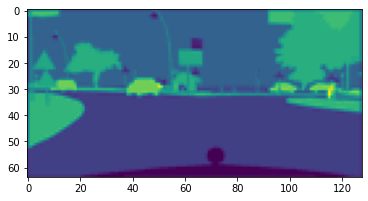

In [32]:
mask_city_down = mask_city.resize((128, 64))
print(mask_city_down.size)
print(mask_city.mode)
plt.imshow(np.array(mask_city_down))
for i in range(64):
    for j in range(32):
        print(mask_city_down.getpixel((i, j)), end=' ')
    print()

(1936, 1216)
136 136 136 136 136 136 136 136 136 136 136 136 136 136 136 136 136 136 136 136 
136 136 136 136 136 136 136 136 136 136 136 136 136 136 136 136 136 136 136 136 
136 136 136 136 136 136 136 136 136 136 136 136 136 136 136 136 136 136 136 136 
136 136 136 136 136 136 136 136 136 136 136 136 136 136 136 136 136 136 136 136 
136 136 136 136 136 136 136 136 136 136 136 136 136 136 136 136 136 136 136 136 
136 136 136 136 136 136 136 136 136 136 136 136 136 136 136 136 136 136 136 136 
136 136 136 136 136 136 136 136 136 136 136 136 136 136 136 136 136 136 136 136 
136 136 136 136 136 136 136 136 136 136 136 136 136 136 136 136 136 136 136 136 
136 136 136 136 136 136 136 136 136 136 136 136 136 136 136 136 136 136 136 136 
136 136 136 136 136 136 136 136 136 136 136 136 136 136 136 136 136 136 136 136 
136 136 136 136 136 136 136 136 136 136 136 136 136 136 136 136 136 136 136 136 
136 136 136 136 136 136 136 136 136 136 136 136 136 136 136 136 136 136 136 136 
136 136 136 136

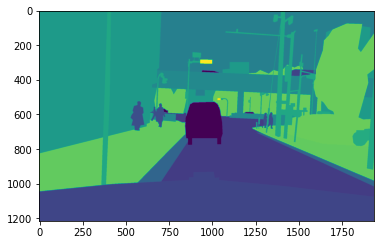

In [53]:
print(mask_sig.size)
plt.imshow(np.array(mask_sig.convert('L')))
mask_sig = mask_sig.convert('L')
for i in range(20):
    for j in range(20):
        print(mask_sig.getpixel((i, j)), end=' ')
    print()
print(np.asarray(mask_sig).ravel())


In [46]:
color_to_idx = np.array(
    [[0, 0, 255],
    [193, 214, 0],
    [180, 0, 129],
    [255, 121, 166],
    [255, 0, 0],
    [65, 166, 1],
    [208, 149, 1],
    [255, 255, 0],
    [255, 134, 0],
    [0, 152, 225],
    [0, 203, 151],
    [85, 255, 50],
    [92, 136, 125],
    [69, 47, 142],
    [136, 45, 66],
    [0, 255, 255],
    [215, 0, 255],
    [180, 131, 135],
    [81, 99, 0],
    [86, 62, 67]])
pallette_test = np.array(
    [[[0, 0, 255], [193, 214, 0], [180, 0, 129], [255, 121, 166]],
    [[255, 0, 0], [65, 166, 1], [208, 149, 1], [255, 255, 0]],
    [[255, 134, 0], [0, 152, 225], [0, 203, 151], [85, 255, 50]],
    [[92, 136, 125], [69, 47, 142], [136, 45, 66], [0, 255, 255]],
    [[215, 0, 255], [180, 131, 135], [81, 99, 0], [86, 62, 67]]])

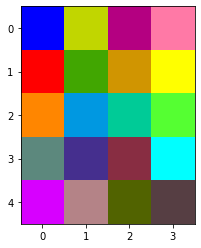

In [47]:
from PIL import ImageDraw

im = Image.fromarray(np.uint8(pallette_test))
plt.imshow(np.array(im))

[[ 29 183  69 166]
 [ 76 117 150 226]
 [155 115 136 181]
 [122  64  75 179]
 [ 93 146  82  70]]


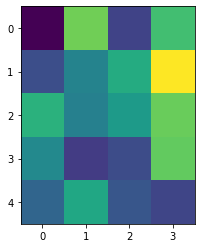

In [50]:
im_L = im.convert('L')
plt.imshow(im_L)
print(np.asarray(im_L))

In [61]:
key = np.ones(10)
key = key * -1
indices = [1, 2, 4]
print((np.asarray(indices) + 2).tolist())
print(range(3))
key[indices] = range(3) 
print(key)

[3, 4, 6]
range(0, 3)
[-1.  0.  1. -1.  2. -1. -1. -1. -1. -1.]


In [64]:
num_class = 3
valid_classes = [3, 4, 12]
key = np.ones(14) * -1
key[(np.asarray(valid_classes) + 1).tolist()] = range(num_class)
print(key)


[-1. -1. -1. -1.  0.  1. -1. -1. -1. -1. -1. -1. -1.  2.]
